In [1]:
# 한글 깨짐 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

### 불균형 dataset

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

In [3]:
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("예측된 레이블의 레이블:", np.unique(pred_most_frequent))
print("test score: {:.2f}".format(dummy_majority.score(X_test,y_test)))

예측된 레이블의 레이블: [False]
test score: 0.90


In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 2).fit(X_train,y_train)
pred_tree = tree.predict(X_test)

print("test score: {:.2f}".format(tree.score(X_test, y_test)))

test score: 0.92


In [5]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train,y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score : {:.2f}".format(dummy.score(X_test,y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score : {:.2f}".format(logreg.score(X_test,y_test)))

dummy score : 0.80
logreg score : 0.98


#### Confusion Matrix



In [6]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬:\n', confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


행을 정답 class /  열은 예측 class

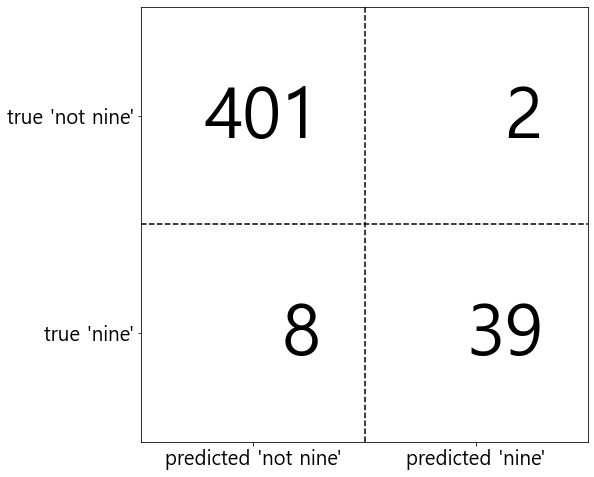

In [7]:
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

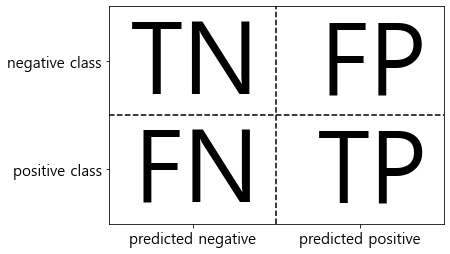

In [8]:
mglearn.plots.plot_binary_confusion_matrix()

In [9]:
print('빈도 기반 더미 모델:')
print(confusion_matrix(y_test, pred_most_frequent))

print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))

print('\n결정 트리:')
print(confusion_matrix(y_test, pred_tree))

print('\n로지스틱 회귀:')
print(confusion_matrix(y_test,pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[372  31]
 [ 41   6]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀:
[[402   1]
 [  6  41]]


In [10]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.14
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


- classification report는 정밀도 / 재현율 / f1 score 모두를 출력

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [12]:
print(classification_report(y_test, pred_dummy, target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      0.92      0.91       403
           9       0.16      0.13      0.14        47

    accuracy                           0.84       450
   macro avg       0.53      0.53      0.53       450
weighted avg       0.82      0.84      0.83       450



In [13]:
print(classification_report(y_test, pred_logreg, target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



#### 불확실성 고려

In [14]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X,y = make_blobs(n_samples=(400,50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=0.5).fit(X_train,y_train)

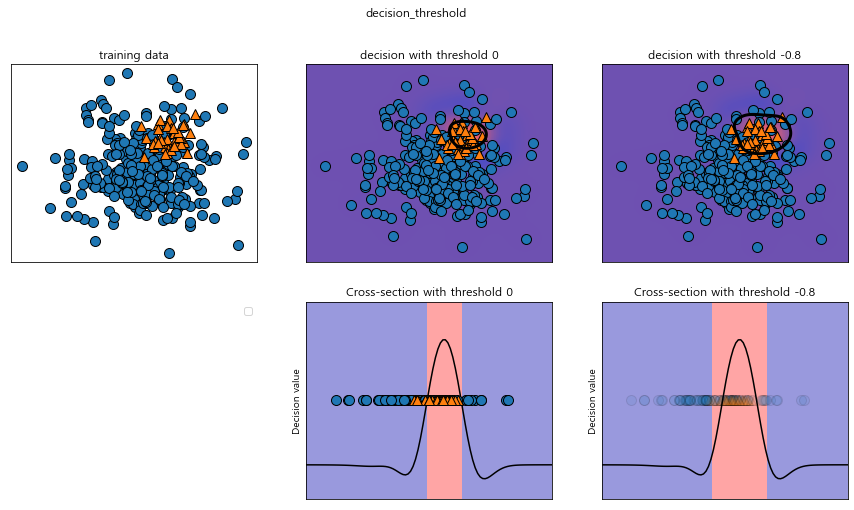

In [15]:
mglearn.plots.plot_decision_threshold()

In [16]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



In [17]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8

In [18]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



In [19]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test,svc.decision_function(X_test))

In [20]:
X,y = make_blobs(n_samples=(4000,500), cluster_std = [7.0,2], random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

svc = SVC(gamma=0.05).fit(X_train,y_train)

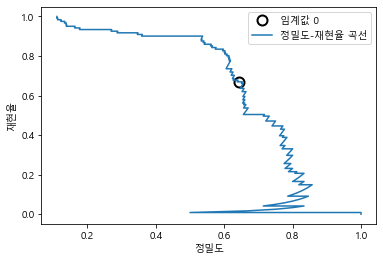

In [21]:
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾는다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label='임계값 0',fillstyle='none',c='k', mew=2)
plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

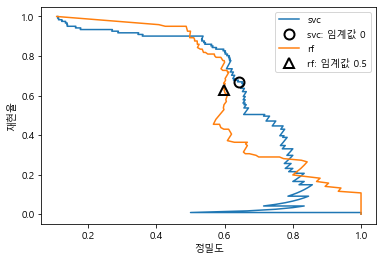

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RFC는 decision_function 대신 predict_proba 제공
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:,1])
plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label="svc: 임계값 0", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf],'^', c='k',
        markersize=10, label="rf: 임계값 0.5", fillstyle='none', mew=2)
plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc="best")


In [ ]:
print('random forest의 f1_score: {:.3f}'.format(f1_s))